In [110]:
import pandas as pd
import numpy as np
import collections
import copy
import matplotlib.pyplot as plt
from nlp.preprocessing import (
    clean_text,
    preprocess,
    tokenize,
    preprocess_document,
    tokenize_document,
    get_stopwords)
from nlp.text_statistics import (
    number_tokens,
    tokens_length,
    unique_tokens,
    count_numbers,
    number_stopwords,
    print_statistics,
    count_tokens,
    sort_frequency_tokens)
from nlp.grouping import (
    get_groups,
    get_groups_size,
    get_unigram_groups,
    get_two_tokens_groups,
    get_first_token_groups,
    groups_frequency_sort
)
from nlp.utils import (
    plot_histogram)
from item.item_list import (
    ItemList,
    Item)
from gensim.parsing.preprocessing import (
    strip_multiple_whitespaces,
    strip_non_alphanum,
    strip_punctuation2,
    strip_short)

In [2]:
itemlist = ItemList()
itemlist.load_items_from_file('../dados/items_preprocessed.zip')

In [111]:
len(itemlist.items_list)

1508992

In [4]:
items_list = itemlist.items_list

In [5]:
items_list[691656].print_item()

{'palavras': ['peca', 'ripa', 'linear'], 'unidades_medida': [], 'números': [], 'cores': [], 'materiais': ['madeira'], 'tamanho': [], 'quantidade': [], 'preço': 2.3, 'dsc_unidade_medida': 'metro'}


In [6]:
items_words = []

for item in items_list:
    item_dict = item.get_item_dict()
    items_words.append(item_dict['palavras'])
    
items_descriptions = items_words

file_recurso = '/Users/Pedro/Desktop/projeto-mp/dados/licitacao_vplr_recurso_funcao.csv'
data_recurso = pd.read_csv(file_recurso, sep=';')

data_recurso.info()

licitacoes_saude = data_recurso.loc[(data_recurso['nom_funcao'] == 'Saúde') & (data_recurso['proporcao_vlr'] >= 5.0)]

seq_dim_licitacao_list = list(licitacoes_saude['seq_dim_licitacao'])

len(set(seq_dim_licitacao_list))

file = '/Users/Pedro/Desktop/projeto-mp/dados/itens_pregao_pitem_saude.csv'
data = pd.read_csv(file, sep=';')

data.info()

data = data.loc[data['seq_dim_licitacao'].isin(seq_dim_licitacao_list)]

len(set(list(data['seq_dim_licitacao'])))

items = list(data['nom_item'])
len(items)

len(set(items))

items_descriptions = preprocess(items, True, False, True)

In [7]:
items_descriptions.count([])

1318

In [8]:
len(items_descriptions)

1508992

In [9]:
items_descriptions[200:300]

[['creme',
  'protetor',
  'pele',
  'contra',
  'oleo',
  'graxo',
  'bng',
  'constar',
  'ca'],
 ['leucograma'],
 ['ranitidina', 'cloridrato', 'apresentacao', 'comprimido', 'dosagem'],
 ['enalapril', 'maleato', 'comprimido'],
 ['filtro', 'diesel', 'trator', 'massey', 'ferguson', 'ano'],
 ['ficha', 'clinica', 'odontologico'],
 ['matriz'],
 ['ficha', 'individual', 'aluno'],
 ['liquido', 'turck', 'diluicao', 'contagem', 'leucocito', 'frasco'],
 ['cadarco', 'algodao', 'rolo'],
 ['cabo', 'bisturi'],
 ['clorpromazina', 'cloridrato', 'comprimido'],
 ['papel', 'seda'],
 ['luva', 'procedimento', 'c100'],
 ['capinar', 'manual'],
 ['dolamin', 'flex', 'cp', 'similar'],
 ['fio',
  'cirurgico',
  'catgut',
  'simples',
  'diametro',
  'agulha',
  'circular',
  'cilindrico'],
 ['filtro',
  'oleo',
  'diesel',
  'wk1040',
  'motor',
  'om904',
  'ano',
  'veiculo',
  'marca',
  'mb'],
 ['box', 'arquivo', 'morto', 'x13', 'confeccionada'],
 ['fita', 'adir', 'dup', 'face', 'fixo', 'forte'],
 ['adaptad

In [10]:
len(unique_tokens(items_descriptions))

97241

In [11]:
token_count = count_tokens(items_descriptions)

In [12]:
tokens_freq = sort_frequency_tokens(token_count)

In [13]:
print_statistics([count for word, count in tokens_freq])

Mean: 72.14352999249287
First quartile: 1.0
Median: 2.0
Third quartile: 6.0
Std: 636.198007227241
Var: 404747.9043999125
Max: 51317
Min: 1.0


In [14]:
counts = [count for word, count in tokens_freq][:100]

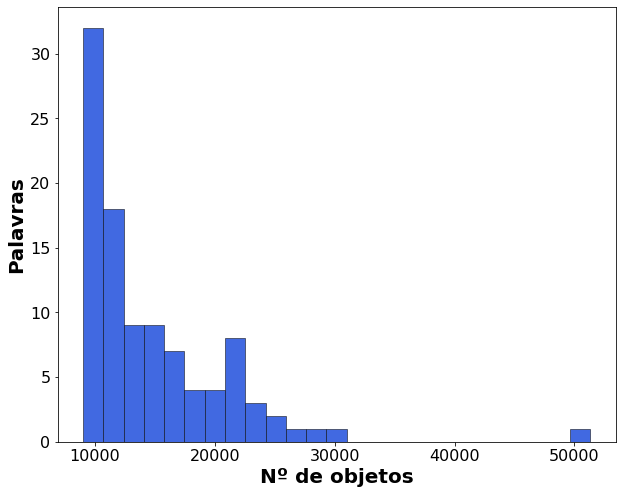

<Figure size 432x288 with 0 Axes>

In [15]:
plot_histogram(counts, 25, 'Nº de objetos', 'Palavras', log=False)

In [ ]:
top1000 = pd.DataFrame(tokens_freq[:1000], columns=['word', 'count'])

In [ ]:
top1000.to_csv('top1000.csv', sep=',', index=False)

In [101]:
token_importance = collections.defaultdict(float)

for doc in items_descriptions:
    freq_sum = 0
    for tok in doc:
        freq_sum += token_count[tok]

    pos = 1
    for tok in doc:
        token_importance[tok] += token_count[tok]/(pos*freq_sum)
        pos += 1

In [102]:
tokens_importances = sort_frequency_tokens(token_importance)

In [103]:
tokens_importances[:50]

[('papel', 25567.302401742185),
 ('pneu', 18989.21729040857),
 ('broca', 15727.763943387574),
 ('sonda', 13364.490840253493),
 ('luva', 13025.282085324918),
 ('filtro', 12686.0786209589),
 ('oleo', 12053.036743253262),
 ('tubo', 10590.03471786131),
 ('cabo', 10212.618488118605),
 ('fita', 8998.655322161243),
 ('fio', 8836.169030953532),
 ('comprimido', 8809.954370430982),
 ('cloridrato', 8200.519762620757),
 ('agulha', 7484.83090252869),
 ('pasta', 7323.130952314457),
 ('agua', 7201.332271052824),
 ('saco', 6917.397745875199),
 ('descartavel', 6505.610311402131),
 ('lampada', 6396.806553824517),
 ('tinta', 6322.944614165861),
 ('porta', 5736.286386966851),
 ('pincel', 5184.256800117997),
 ('envelope', 4807.870094125773),
 ('cola', 4751.867527308843),
 ('kit', 4637.313509674808),
 ('parafuso', 4616.919825615202),
 ('solucao', 4591.56116240174),
 ('ficha', 4541.626243710678),
 ('disjuntor', 4421.085861416931),
 ('placa', 4405.319016796141),
 ('ar', 4347.018953968565),
 ('po', 4271.162310

In [69]:
top1000 = pd.DataFrame(tokens_importances[:1000], columns=['word', 'weight'])

In [70]:
top1000.to_csv('top1000_weighted.csv', sep=',', index=False)

In [19]:
values = [count for word, count in tokens_importances][:100]
sum_values = sum(values[:100])
values = [x/sum_values for x in values]

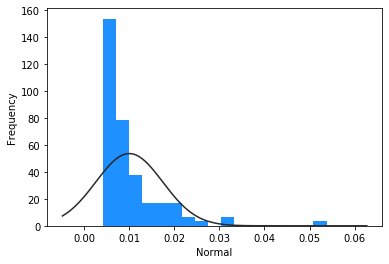

In [20]:
import seaborn as sns
from scipy.stats import norm

ax = sns.distplot(values,
                  kde=False,
                  color='dodgerblue',
                  hist_kws={"linewidth": 15,'alpha':1},
                  fit=norm)
ax.set(xlabel='Normal', ylabel='Frequency')
plt.show()

unigrams = []

for doc in items_descriptions:
    maxi = 0.0
    pos = 1
    tok_description_importance = {}
    for token in doc:
        importance = token_importance[token]/pos
        tok_description_importance[token] = importance
        pos += 1

    unigram = None
    for token, importance in tok_description_importance.items():
        if importance > maxi:
            maxi = importance
            unigram = token
    unigrams.append(unigram)

In [104]:
unigrams = get_unigram_groups(items_descriptions, token_importance)

In [105]:
unigrams[:50]

['colagenase',
 'campo',
 'kit',
 'tinta',
 'digital',
 'sodio',
 'panfleto',
 'uso',
 'ciprofloxacino',
 'externar',
 'po',
 'tubo',
 'limpo',
 'papel',
 'vassoura',
 'solucao',
 'massa',
 'sulfadiazina',
 'formulario',
 'tinta',
 'fator',
 'suco',
 'filtro',
 'alavanca',
 'cateter',
 'cola',
 'papel',
 'cps',
 'fio',
 'filtro',
 'fixador',
 'milhar',
 'papel',
 'locao',
 'cabo',
 'borracha',
 'padrao',
 'calculador',
 'saco',
 'lenco',
 'descartavel',
 'reator',
 'sulfadiazina',
 'oleo',
 'ebulidor',
 'carne',
 'broca',
 'topiramato',
 'oleo',
 'folha']

In [106]:
groups = get_groups(unigrams)

In [107]:
len(groups)

10007

In [108]:
groups_size = get_groups_size(groups)

In [109]:
groups_size.count(1)

3007

In [89]:
group_sample = []

for group, size in groups.items():
    if size > 10000:
        group_sample.append(group)
        
group_sample[:10]

['tinta',
 'po',
 'tubo',
 'papel',
 'solucao',
 'filtro',
 'fio',
 'cabo',
 'saco',
 'descartavel']

In [90]:
groups_size.sort(reverse=True)

In [91]:
groups_size[:10]

[51228, 26924, 24224, 23990, 23152, 23119, 21542, 20965, 20628, 20043]

In [92]:
groups_names_size = groups_frequency_sort(groups)

In [93]:
groups_names_size[:10]

[('papel', 51228),
 ('pneu', 26924),
 ('cabo', 24224),
 ('broca', 23990),
 ('comprimido', 23152),
 ('filtro', 23119),
 ('luva', 21542),
 ('sonda', 20965),
 ('tubo', 20628),
 ('fio', 20043)]

In [94]:
print_statistics(groups_size)

Mean: 150.8579147488493
First quartile: 1.0
Median: 3.0
Third quartile: 14.0
Std: 1164.8859738288156
Var: 1356959.3320231081
Max: 51228
Min: 1.0


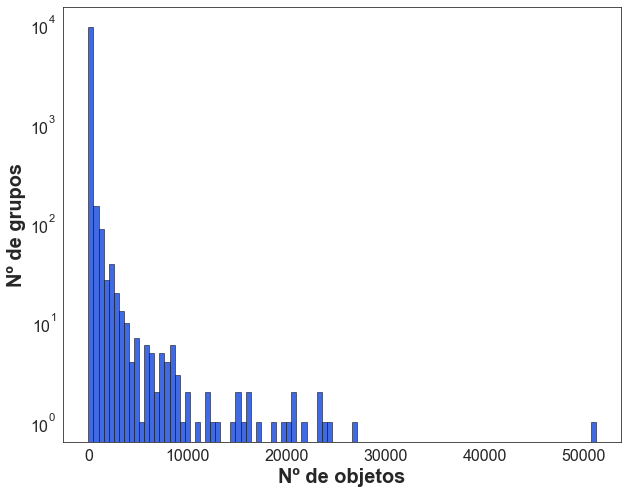

<Figure size 432x288 with 0 Axes>

In [95]:
plot_histogram(groups_size, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [96]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,5000]'] = 0
count_interval['(5000,10000]'] = 0
count_interval['>10000'] = 0

In [97]:
for p in groups_size:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 5000:
        count_interval['(1000,5000]'] += 1
    elif p > 5000 and p <= 10000:
        count_interval['(5000,10000]'] += 1
    else:
        count_interval['>10000'] += 1

In [98]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value, 100*float(value)/len(groups))
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

1 : 3010 30.118070842505503
(1,5] : 3287 32.88973384030418
(5,10] : 844 8.445067040224135
(10,100] : 1765 17.66059635781469
(100,1000] : 819 8.194916950170102
(1000,5000] : 209 2.091254752851711
(5000,10000] : 34 0.3402041224734841
>10000 : 26 0.26015609365619374


In [99]:
intervals_df = pd.DataFrame(lines, columns=["Preço"])
intervals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 1 columns):
Preço    9994 non-null object
dtypes: object(1)
memory usage: 78.2+ KB


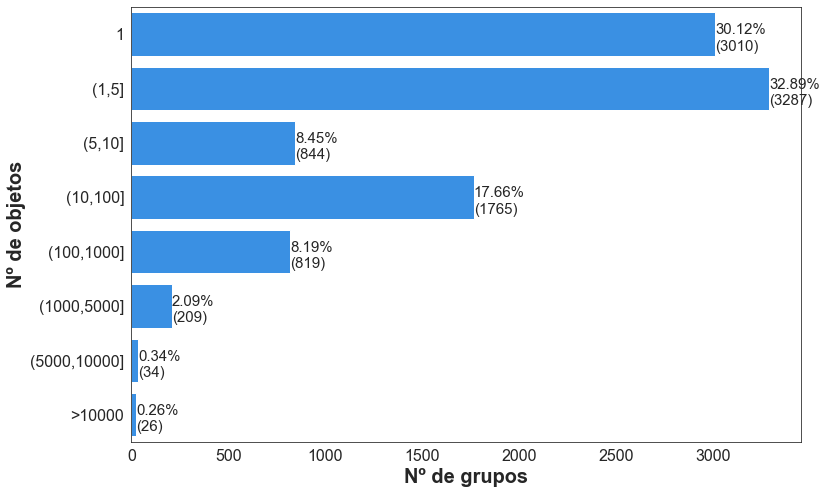

<Figure size 432x288 with 0 Axes>

In [100]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="Preço", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

In [37]:
bigrams = get_two_tokens_groups(items_descriptions, token_count)

In [ ]:
bigrams_groups = get_groups(bigrams)

In [ ]:
group_sample = []

for group, size in bigrams_groups.items():
    if size >= 2000:
        group_sample.append(group)
        
group_sample[:10]

In [ ]:
len(bigrams_groups)

In [ ]:
bigrams_groups_size = get_groups_size(bigrams_groups)

In [ ]:
bigrams_groups_size.count(1)

In [ ]:
bigrams_groups_names_size = groups_frequency_sort(bigrams_groups)

In [ ]:
bigrams_groups_names_size[:10]

In [ ]:
print_statistics(bigrams_groups_size)

In [ ]:
plot_histogram(bigrams_groups_size, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [ ]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,2000]'] = 0
count_interval['>2000'] = 0

In [ ]:
for p in bigrams_groups_size:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 2000:
        count_interval['(1000,2000]'] += 1
    else:
        count_interval['>2000'] += 1

In [ ]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value, 100*float(value)/len(bigrams_groups))
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

In [ ]:
intervals_df = pd.DataFrame(lines, columns=["Preço"])
intervals_df.info()

In [ ]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="Preço", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

In [ ]:
first_tokens = get_first_token_groups(items_descriptions)

In [ ]:
first_tokens_groups = get_groups(first_tokens)

In [ ]:
len(first_tokens_groups)

In [ ]:
firstt_groups_size = get_groups_size(first_tokens_groups)

In [ ]:
firstt_groups_size.count(1)

In [ ]:
group_sample = []

for group, size in first_tokens_groups.items():
    if size > 5000:
        group_sample.append(group)
        
group_sample[:10]

In [ ]:
print_statistics(firstt_groups_size)

In [ ]:
firstt_groups_names_size = groups_frequency_sort(first_tokens_groups)

In [ ]:
firstt_groups_names_size[:10]

In [ ]:
plot_histogram(firstt_groups_size, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [ ]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,5000]'] = 0
count_interval['>5000'] = 0

In [ ]:
for p in firstt_groups_size:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 5000:
        count_interval['(1000,5000]'] += 1
    else:
        count_interval['>5000'] += 1

In [ ]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value, 100*float(value)/len(first_tokens_groups))
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

In [ ]:
intervals_df = pd.DataFrame(lines, columns=["Preço"])
intervals_df.info()

In [ ]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="Preço", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

In [ ]:
data2 = data[['nom_item', 'vlr_unitario_homologado']]
data2.info()

In [ ]:
items_prices = data2.values.tolist()

In [ ]:
tuples = []

for l in items_prices :
    tuples.append((l[0], l[1]))

In [ ]:
items_prices = list(tuples)

In [ ]:
len(items_prices)

In [ ]:
items_descriptions_prices = []

for i in range(0, len(items_prices)):
    items_descriptions_prices.append((items_descriptions[i], items_prices[i][1]))

In [ ]:
len(items_descriptions_prices)

In [ ]:
groups_prices = collections.defaultdict(list)
stopwords_ = get_stopwords()

for description, price in items_descriptions_prices:
    doc_tokenized = description
    if len(doc_tokenized) != 0 and price != 0:
        groups_prices[doc_tokenized[0]].append(price)

In [ ]:
len(groups_prices)

In [ ]:
firstt_groups_names_size[:10]

In [ ]:
for group in firstt_groups_names_size[:10]:
    print(group[0].upper())
    print_statistics(groups_prices[group[0]])